# Asher's Telecom Operators Project


Howdy! 

The overall goal of this task to is to find the ineffective telecom operators for my superiors. What ineffective means is that there are many missed calls and a long wait time for incoming and outbound calls. The reason we are looking for this data is to help my supervisors understand what will allow us to provide a better service for our customers. Based on my analysis we will have a better understanding which operators to continue using and which operators we need to get rid of. 

Boiled down Task: Determine the operators with most missed calls and longest wait times


## Link to archive with rest of project: https://drive.google.com/drive/folders/1CuAVmQaEE-DtJ8igUv6KlXMravr-h0lS?usp=sharing

## Importing and looking at the data

We will be using a few tools to analyze:
1. Pandas: To create beautiful dataframes
3. Numpy: for general coding and math applications 
4. Matplotlib: For beautiful graphs 
5. Sklearn: for wonderful machine learning 
6. seaborn: for beautiful plots
7. scipy: for running statistical tests

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data1= pd.read_csv('/datasets/telecom_clients_us.csv')
data2= pd.read_csv('/datasets/telecom_dataset_us.csv')

## Reading the data and displaying the data's values 


In [3]:
display(data1.head())
display(data1.describe())
data1.info()
for column in data1:
    display(data1[column].value_counts())

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


166926    1
168227    1
166377    1
168284    1
168281    1
         ..
167580    1
166555    1
167981    1
168601    1
167936    1
Name: user_id, Length: 732, dtype: int64

C    395
B    261
A     76
Name: tariff_plan, dtype: int64

2019-09-24    24
2019-10-09    20
2019-10-07    19
2019-08-29    18
2019-09-18    18
              ..
2019-08-31     1
2019-10-19     1
2019-10-20     1
2019-09-01     1
2019-09-21     1
Name: date_start, Length: 73, dtype: int64

### Reading the second file's data and exploring the values 

In [4]:
display(data2.head())
display(data2.describe())
data2.info()
for column in data2:
    print(data2[column].value_counts())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null object
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null float64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
168187    2580
166658    2107
167497    1405
167626    1311
166916    1308
          ... 
168013       1
167981       1
166584       1
166554       1
168578       1
Name: user_id, Length: 307, dtype: int64
2019-11-25 00:00:00+03:00    1220
2019-11-28 00:00:00+03:00    1198
2019-11-21 00:00:00+03:00    1186
2019-11-27 00:00:00+03:00    1180
2019-11-22 00:00:00+03:00    1176
                             ... 
2019-08-03 

 We are missing quite a few operator IDs

## Dropping the Missing operator IDs because it is too important to allow them to stay and mess thm up 

In [11]:
data2.dropna(inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
user_id                45670 non-null int64
date                   45670 non-null datetime64[ns, pytz.FixedOffset(180)]
direction              45670 non-null object
internal               45670 non-null object
operator_id            45670 non-null float64
is_missed_call         45670 non-null bool
calls_count            45670 non-null int64
call_duration          45670 non-null int64
total_call_duration    45670 non-null int64
dtypes: bool(1), datetime64[ns, pytz.FixedOffset(180)](1), float64(1), int64(4), object(2)
memory usage: 3.2+ MB


## Changing the format to datetime for the dates we need to work with 

In [12]:
data1['date_start']= pd.to_datetime(data1['date_start'], format="%Y-%m-%d")
data2['date']= pd.to_datetime(data2['date'], format="%Y-%m-%d")

In [13]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
user_id                45670 non-null int64
date                   45670 non-null datetime64[ns, pytz.FixedOffset(180)]
direction              45670 non-null object
internal               45670 non-null object
operator_id            45670 non-null float64
is_missed_call         45670 non-null bool
calls_count            45670 non-null int64
call_duration          45670 non-null int64
total_call_duration    45670 non-null int64
dtypes: bool(1), datetime64[ns, pytz.FixedOffset(180)](1), float64(1), int64(4), object(2)
memory usage: 3.2+ MB


## Analyzing operators - Which ones do we need for our testing?

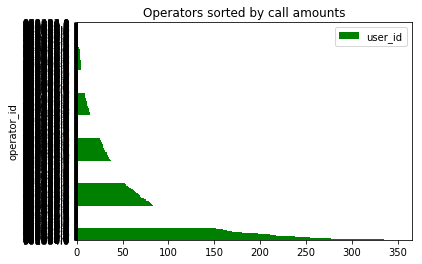

In [14]:
grouped_operators = data2.groupby('operator_id').agg({'user_id':'count'}).reset_index()
# grouped_operators.rename(columns={'operator_id': 'operators','operator_id':'count'}, inplace=True)
sorted_operators = grouped_operators.sort_values(by='user_id', ascending=False)
sorted_operators.plot(kind='barh', x= 'operator_id', y='user_id', color='green')
plt.title('Operators sorted by call amounts')
plt.show()

We found that many operators have made less than 20 calls. This is problematic because we need a good enough basis for calling an operator good or bad. If we score them based off one call it will probably not work out well.

## Selecting operators with over 20 data points 

In [15]:
sorted_operators_more_than_20 = sorted_operators[sorted_operators['user_id']>20]

In [16]:
print(sorted_operators_more_than_20.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 204 to 1051
Data columns (total 2 columns):
operator_id    547 non-null float64
user_id        547 non-null int64
dtypes: float64(1), int64(1)
memory usage: 12.8 KB
None


This leaves us with 547 operators. Not too shabby. 

## Plotting the operators with over 20 calls 

Text(0.5, 1.0, 'Operators with over 20 calls')

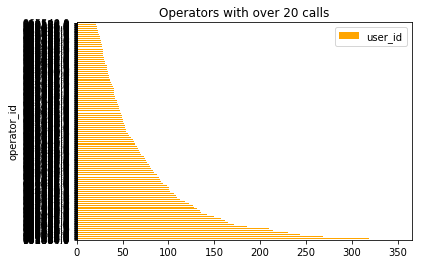

In [17]:
sorted_operators_more_than_20.plot(kind='barh', x= 'operator_id', y='user_id', color='orange')
plt.title('Operators with over 20 calls')

In [18]:
sorted_operators_more_than_20 = sorted_operators_more_than_20['operator_id']

# Creating a Dataframe with only relevant operators 

In [19]:
better_data= data2.merge(sorted_operators_more_than_20, on='operator_id')
print(better_data)

       user_id                      date direction internal  operator_id  \
0       166377 2019-08-05 00:00:00+03:00       out     True     880022.0   
1       166377 2019-08-05 00:00:00+03:00       out    False     880022.0   
2       166377 2019-08-08 00:00:00+03:00       out    False     880022.0   
3       166377 2019-08-08 00:00:00+03:00       out    False     880022.0   
4       166377 2019-08-09 00:00:00+03:00       out    False     880022.0   
...        ...                       ...       ...      ...          ...   
41727   168601 2019-11-26 00:00:00+03:00        in    False     952914.0   
41728   168601 2019-11-27 00:00:00+03:00        in    False     952914.0   
41729   168601 2019-11-27 00:00:00+03:00       out    False     952914.0   
41730   168601 2019-11-27 00:00:00+03:00       out    False     952914.0   
41731   168601 2019-11-28 00:00:00+03:00       out    False     952914.0   

       is_missed_call  calls_count  call_duration  total_call_duration  
0             

We used pd.merge and then get rid of the duplicates 

## Creating a column for wait times! 

In [20]:
better_data['wait_time']= better_data['total_call_duration']-better_data['call_duration']

## Converting direction from in/out to binary so we can manipulate it 

In [21]:
better_data['missed_count']= better_data['is_missed_call'].astype(int)
di = {'out':1, 'in':0}
better_data.replace({'direction':di},inplace=True)

In [22]:
operator_by_wait_time = better_data.sort_values(by='wait_time', ascending=False)
print(operator_by_wait_time.head(50))

       user_id                      date  direction internal  operator_id  \
40686   168361 2019-11-04 00:00:00+03:00          1    False     945278.0   
31748   167827 2019-10-31 00:00:00+03:00          1    False     929428.0   
5735    166582 2019-10-01 00:00:00+03:00          1    False     885876.0   
5734    166582 2019-10-01 00:00:00+03:00          1    False     885876.0   
5710    166582 2019-09-24 00:00:00+03:00          1    False     885876.0   
5944    166582 2019-10-22 00:00:00+03:00          1    False     925922.0   
31750   167827 2019-11-01 00:00:00+03:00          1    False     929428.0   
31752   167827 2019-11-05 00:00:00+03:00          1    False     929428.0   
5732    166582 2019-10-01 00:00:00+03:00          1    False     885876.0   
5704    166582 2019-09-23 00:00:00+03:00          1    False     885876.0   
5686    166582 2019-09-17 00:00:00+03:00          1    False     885876.0   
31757   167827 2019-11-07 00:00:00+03:00          1    False     929428.0   

## Creating a DataFrame with all of the data we collected in order to measure operator performance 

In [23]:
wait_data= better_data.groupby('operator_id').agg({'wait_time':'mean','missed_count':'mean','direction':'mean','call_duration':'mean'})
print(wait_data.sort_values(by='wait_time', ascending=False))
wait_data['score']= 3  
print(wait_data.info())

               wait_time  missed_count  direction  call_duration
operator_id                                                     
925922.0     5907.443038      0.417722   0.632911   11759.924051
885890.0     5727.133574      0.397112   0.628159   13238.747292
929428.0     5325.342857      0.500000   1.000000    4194.285714
885876.0     4816.241379      0.423197   0.677116   14620.545455
908640.0     3456.461538      0.461538   1.000000    6164.538462
...                  ...           ...        ...            ...
907970.0       12.230769      0.296703   0.824176     166.681319
897872.0       11.843750      0.312500   0.875000     162.437500
958672.0       11.038462      0.307692   1.000000      85.576923
940456.0       11.027027      0.297297   0.594595      49.351351
930908.0        9.239130      0.217391   0.478261     146.347826

[547 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Float64Index: 547 entries, 879896.0 to 969272.0
Data columns (total 5 columns):
wait_time    

## Using numpys percentiles to find out what exactly is a bad operator. 
Good and bad is relative so we decided to choose what is "bad" according to the rest of their cohort. 

In [24]:
pwait = np.percentile(wait_data['wait_time'],[80])
pmissed =np.percentile(wait_data['missed_count'], [80])
pdir= np.percentile(wait_data['direction'], [50])
print("Wait times over 80th percentile ",pwait)
print('AVG Missed calls over 80th percentile',pmissed)
print('Average call direction',pdir)

Wait times over 80th percentile  [412.90452529]
AVG Missed calls over 80th percentile [0.47261227]
Average call direction [0.74468085]


## Creating an OperRATER (Get it?Because we use this to rate the operators? ). It is a scoring system to weed out the bad ones. The three main criteria are wait times, missed calls, and outbound calls. The highest score an operator can get is 3 and the lowest is 0. 

In [25]:
def calc_score(row):
        if row['wait_time'] > 412:
            row['score']-=1
        if row['missed_count'] > .47:
            row['score']-=1
        if row['direction'] < .74:
            row['score']-=1
        return row

Now we apply the function to our table

In [26]:
final_data=wait_data.apply(calc_score, axis=1)
display(final_data)

,wait_time,missed_count,direction,call_duration,score
operator_id,,,,,
879896.0,110.671875,0.390625,0.820312,650.476562,3.0
879898.0,451.860000,0.400000,0.748000,1115.504000,2.0
880020.0,15.181818,0.318182,0.636364,104.090909,2.0
880022.0,57.565789,0.434211,0.894737,240.842105,3.0
880026.0,121.171717,0.474747,0.904040,856.939394,2.0
...,...,...,...,...,...
964510.0,66.555556,0.407407,0.740741,385.074074,3.0
964666.0,890.000000,0.375000,0.583333,2278.291667,1.0
965540.0,1053.904762,0.476190,1.000000,3818.428571,1.0


We can see that there are clearly operators who have perfect scores and many that do not

## Showing Score Distribution with Pie CHart 

Text(0.5, 1.0, 'Socres of Operators')

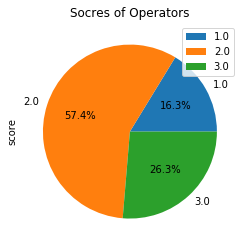

In [37]:
forchart= final_data.groupby('score').agg({'direction':'count'})
forchart.plot.pie(autopct="%.1f%%",y='direction');
# forchart.plot(kind='pie', y='direction')
plt.ylabel('score')
plt.title('Socres of Operators')

We see that the marjority of restaurants are not the highest score and not the worst.

## Dividing the Data for Hypothesis testing 

What I planned on testing in the decomposition task is whether average call length for operator is an indicator of a good or bad operator

In [ ]:
ptime= np.percentile(wait_data['call_duration'], [50])
print(ptime)
long_call_op = final_data[wait_data['call_duration']>=510]
short_call_op= final_data[wait_data['call_duration']<510]


## Formulating the Hypothesis

If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. If the p-value is larger than 0.05, we cannot conclude that a significant difference exists.


Null Hypothesis:
Call length is unrelated to operator score. 
Alternative Hypothesis:
Call length changes depending on operators because the service is not as good. 


## Veiwing the groups before testing the Hypothesis

In [224]:
long_call_op.describe()

,wait_time,missed_count,direction,call_duration,score
count,275.000000,275.000000,275.000000,275.000000,275.000000
mean,607.925543,0.408547,0.789710,1728.488241,1.850909
std,827.605162,0.119574,0.242678,1773.988846,0.685851
min,17.636364,0.000000,0.000000,510.139535,1.000000
25%,143.268918,0.343918,0.654321,699.848538,1.000000
50%,319.589286,0.423197,0.837209,1113.833333,2.000000
75%,819.221554,0.500000,1.000000,1968.703400,2.000000
max,5907.443038,0.676471,1.000000,14620.545455,3.000000


In [225]:
short_call_op.describe()

,wait_time,missed_count,direction,call_duration,score
count,272.000000,272.000000,272.000000,272.000000,272.000000
mean,66.473388,0.279262,0.627783,260.290395,2.352941
std,69.032811,0.133925,0.303904,121.568390,0.486412
min,9.239130,0.000000,0.000000,39.545455,1.000000
25%,30.270536,0.204762,0.518249,162.379712,2.000000
50%,44.768561,0.303030,0.681568,240.048325,2.000000
75%,69.380476,0.366057,0.851261,353.994965,3.000000
max,482.304348,0.594595,1.000000,508.844037,3.000000


## Testing the Hypothesis

In [226]:
alpha = 0.05

results = st.ttest_ind(long_call_op['score'], short_call_op['score'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis of equal averages")
else:
    print("We can't reject the null hypothesis")

p-value:  3.1233592770647294e-21
We reject the null hypothesis of equal averages


We reject the Null hypothesis!! There are differences in the two groups! The operators with the shorter call averages ended up having higher scores. Maybe the metrics we are using are not telling the whole story? Less and shorter calls can mean that overall there are less wait times and issues. 

## Machine Learning!! 
We now move on to our next session! Machine learning here we are going to check the probablities of scores. 

In [227]:
X= final_data.drop('score', axis=1)
y= final_data['score']
X.columns

Index(['wait_time', 'missed_count', 'direction', 'call_duration'], dtype='object')

## Dividing the Data into train and test

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Defining and Training the Model. Then creating predictions and probabilities

In [229]:
# define the model's algorithm 
model = LogisticRegression()

# train your model
model.fit(X_train, y_train)

# use the trained model to make forecasts
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

C:\Users\raden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Creating Hierarchical clustering for Telecom Operator Scores 

In [230]:
sc = StandardScaler()
x_sc = sc.fit_transform(final_data)

We fitted the data now we are going to create the actual dendogram 

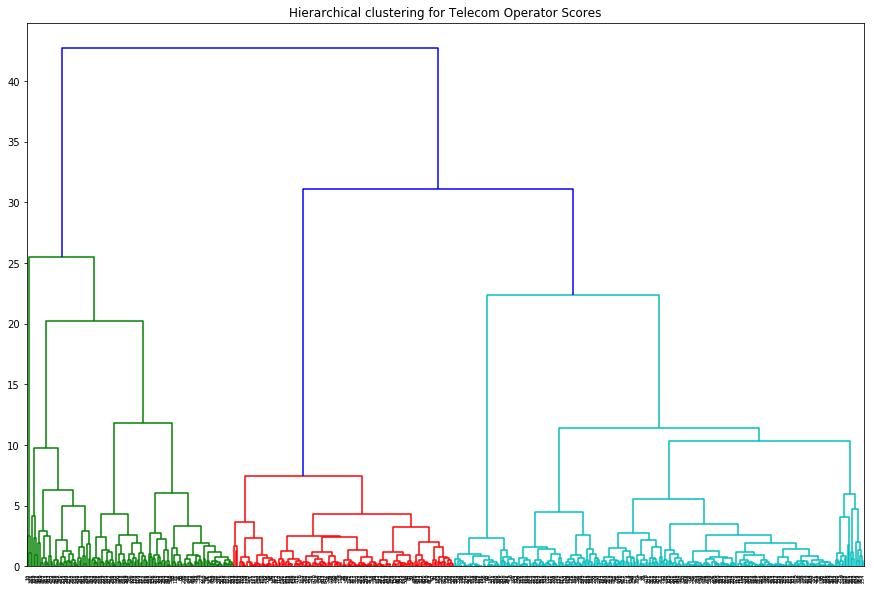

In [231]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Telecom Operator Scores')
plt.show() 

## Dividing them into clusters so we can explore what they are doing. Based off the dendogram it looks like 3 clusters could be the way to go! 

In [232]:
# define the k_means model with 3 clusters
km = KMeans(n_clusters = 3, random_state=0)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)


## Looking at our average clusters and seeing what we can learn from the way they are divided 

In [233]:
# store cluster labels into the field of our dataset
final_data['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
clusters= final_data.groupby(['cluster_km']).mean().reset_index()
display(clusters)

,cluster_km,wait_time,missed_count,direction,call_duration,score
0,0,84.082517,0.118218,0.230272,480.469041,1.969072
1,1,146.177046,0.364530,0.776103,590.276619,2.393855
2,2,1356.227166,0.503704,0.953762,3132.703557,1.097826


## Creating a function to show the clusters on one plot together 

In [234]:
def show_clusters_on_plot1(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.boxplot(df[x_name], df[y_name],hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

## Plotting the clusters

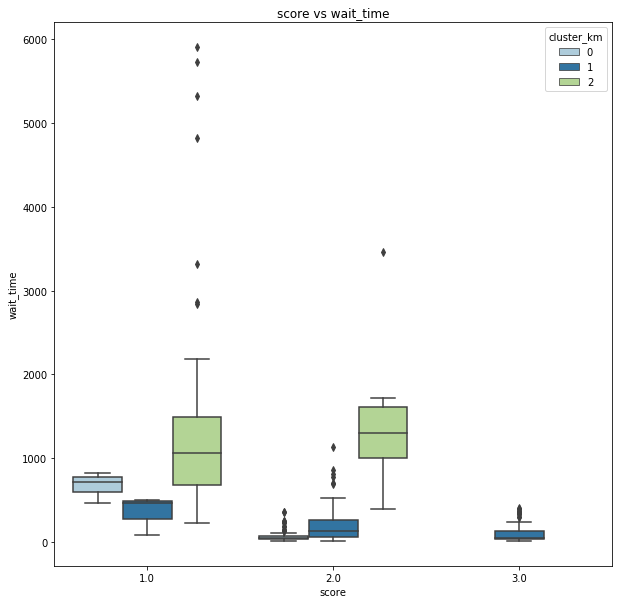

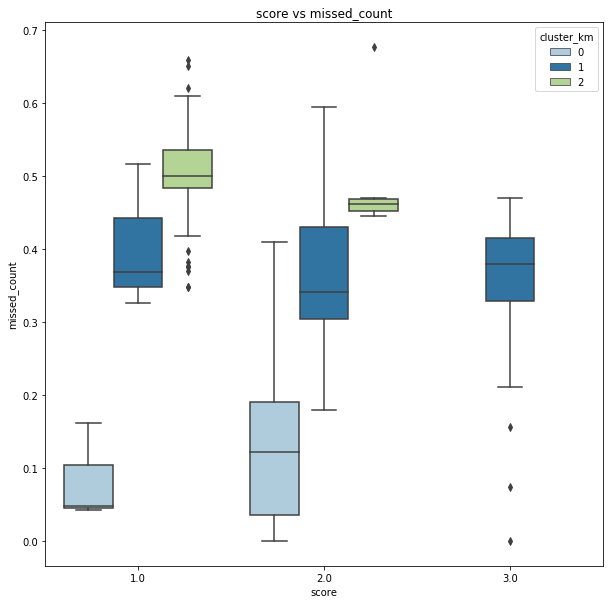

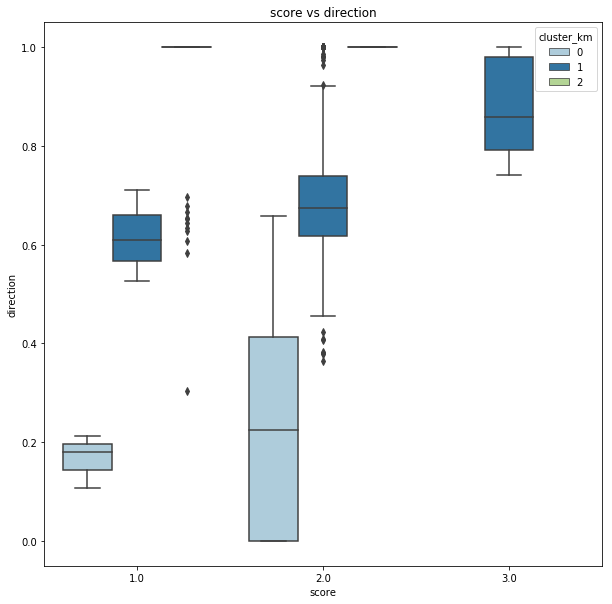

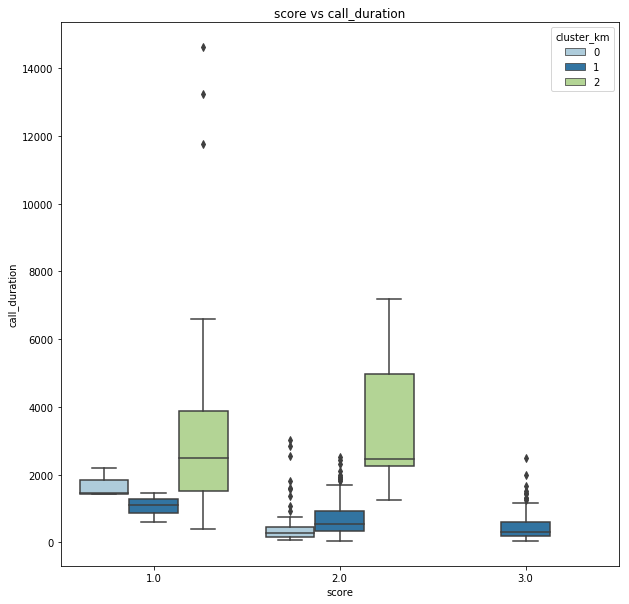

In [235]:
show_clusters_on_plot1(final_data,'score','wait_time','cluster_km')
show_clusters_on_plot1(final_data,'score','missed_count','cluster_km')
show_clusters_on_plot1(final_data,'score','direction','cluster_km')
show_clusters_on_plot1(final_data,'score','call_duration','cluster_km')


Based off of our clustering it looks like Direction of call had the biggest impact in correlation to the scoring of our clusters. Which is interesting because we would have assumed that missed calls and wait times would be more intense metrics. Based off what the clusters are showing it looks like some of the other metrics that we aren't looking at play a key role in operator performance. Maybe we need to look deeper into some of the metrics and see if we can find something that really gives us a better understanding of why operators are good or bad. It would also be interesting to have a customer satisfaction survey to compare our scores with scores that the customers give based on operator. 

# Conclusion 

We have done quite a bit. We have done:

1. Data preprocessing: data gets transformed into usable data 
2. Exploratory data analysis: Looking at the data we have, look for missing values, abnormal values,convert the values, remove duplicates, manage mislabeled columns. 
3. Break down the groups: finding ineffective operators, making clusters, further getting a grip on the data, using groupby to make groups. 
4. Hypothesis testing: using statistical methods to see if they hypothesis makes sense. 
5. (potentially) machine learning: breaking the data into train and test, using the data to create clusters. See what features clusters have to get a better understanding of the data. 

My boss can now use my scoring system to see exactly which operators underperformed and why. In addition to that we can change the parameters for scoring to create a more focused system! 

Overall I think that the operator scoring system can be used for the company. We would want to get better parameters for the data from our supervisor to see if we can create a threshold that they would agree with of how many data points each operator needs before we can score them. 

 Maybe we need to look deeper into some of the metrics and see if we can find something that really gives us a better understanding of why operators are good or bad. It would also be interesting to have a customer satisfaction survey to compare our scores with scores that the customers give based on operator. 

## Useful Readings 
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html Pandas documentation for their groupby function. Although, it might seem  somewhat base this page really helped understand the potential of what I could do for this project.
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html This helped me with my hypothesis testing. I was able to use their t-test to test to averages against each other. 
3. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html Helped me understand clustering a little bit better as well as expectation maximization.
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html Used this for a little more background for my dendogram and how to make it work. 
5. https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce This EDA article helped with using Seaborn and reminding me of some of the more clear cut methods I can use for my project. 
6. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html I used this to better understand the structures of my dataframes. I needed to apply my function to the rows of my dataframe so I read through this a bit. 